In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from packages import open_data, plot_data, thresholds

directory = os.chdir("/home/leopaul/po_proj/")

In [3]:
sr = open_data(
    "FRNOR.RR2025010565429.PPDH.KEYuAAuu91dxAxu2BfU7xuA.csv",
    "TX"
)

/home/leopaul/po_proj/packages.py:12: DtypeWarning: Columns (2,3,6,7,9,10,11,13,17,18,19,21,23,24,25,27,29,40,41,45,49,51,53,55,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=';', encoding='utf-8')


DatetimeIndex(['1930-08-01 00:00:00', '1930-08-01 03:00:00',
               '1930-08-01 06:00:00', '1930-08-01 09:00:00',
               '1930-08-01 12:00:00', '1930-08-01 15:00:00',
               '1930-08-01 18:00:00', '1930-08-01 21:00:00',
               '1930-08-02 00:00:00', '1930-08-02 03:00:00',
               ...
               '2025-06-28 03:00:00', '2025-06-28 06:00:00',
               '2025-06-28 09:00:00', '2025-06-28 12:00:00',
               '2025-06-28 15:00:00', '2025-06-28 18:00:00',
               '2025-06-28 21:00:00', '2025-06-29 00:00:00',
               '2025-06-29 03:00:00', '2025-06-29 06:00:00'],
              dtype='datetime64[ns]', name='DATE', length=194506, freq=None)


## General view

In [4]:
sr_stdy = sr.loc["1997-02-01 00:00:00":"2024-12-31 23:00:00"]

sr_max_d = sr_stdy.resample("D").max()
dates_nan = sr_max_d[sr_max_d.isna()].index
nan_by_year = sr_max_d.isna().groupby(sr_max_d.index.year).sum()
nan_by_year = nan_by_year[nan_by_year != 0]
print(nan_by_year)
print(dates_nan)

DATE
2019    7
2020    1
Name: TX, dtype: int64
DatetimeIndex(['2019-07-08', '2019-07-09', '2019-07-10', '2019-07-11',
               '2019-07-27', '2019-07-28', '2019-08-18', '2020-05-08'],
              dtype='datetime64[ns]', name='DATE', freq=None)


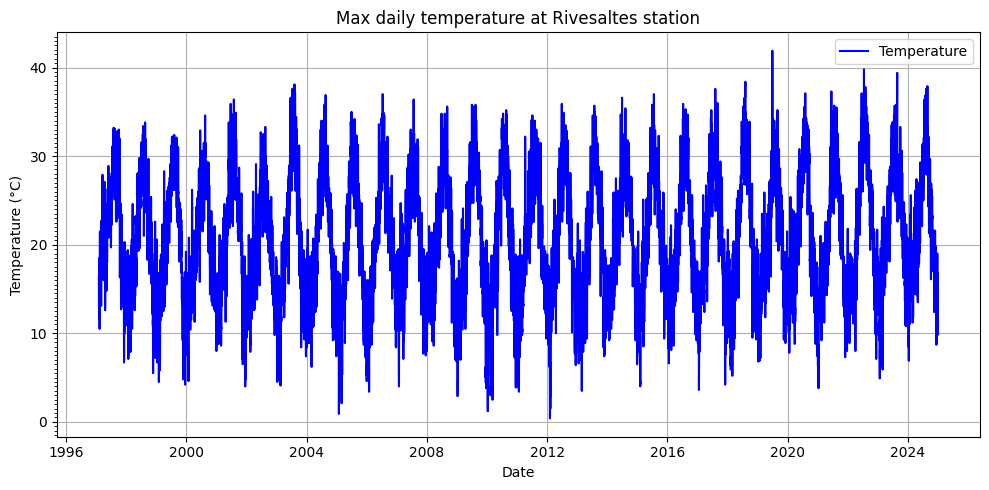

In [4]:
plot_data(
    sr_max_d,
    "Temperature",
    "Max daily temperature",
    "max_daily_temp_1997_2024"
)

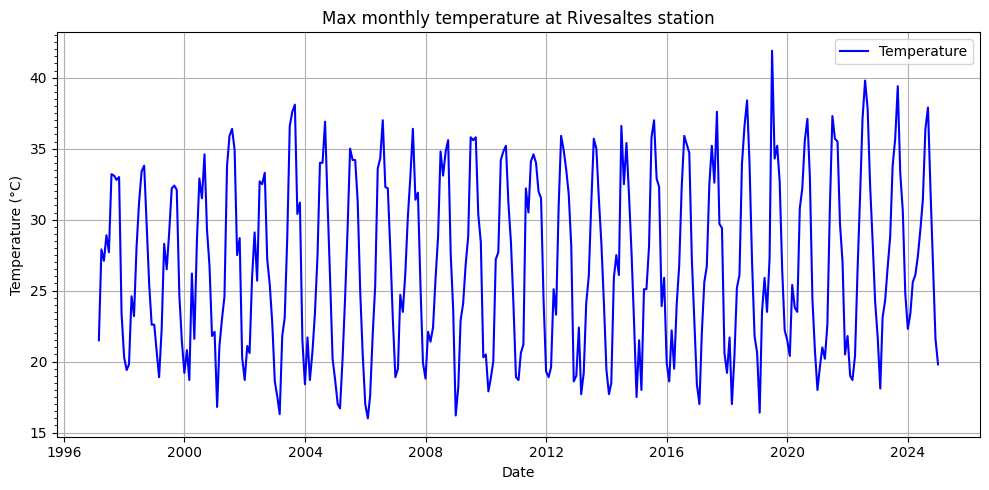

In [5]:
sr_max_m = sr_max_d.resample("ME").max()
plot_data(
    sr_max_m,
    "Temperature",
    "Max monthly temperature",
    "max_monthly_temp_1997_2024"
)

## Normal and quantiles for 1997-2010 and 2011-2024

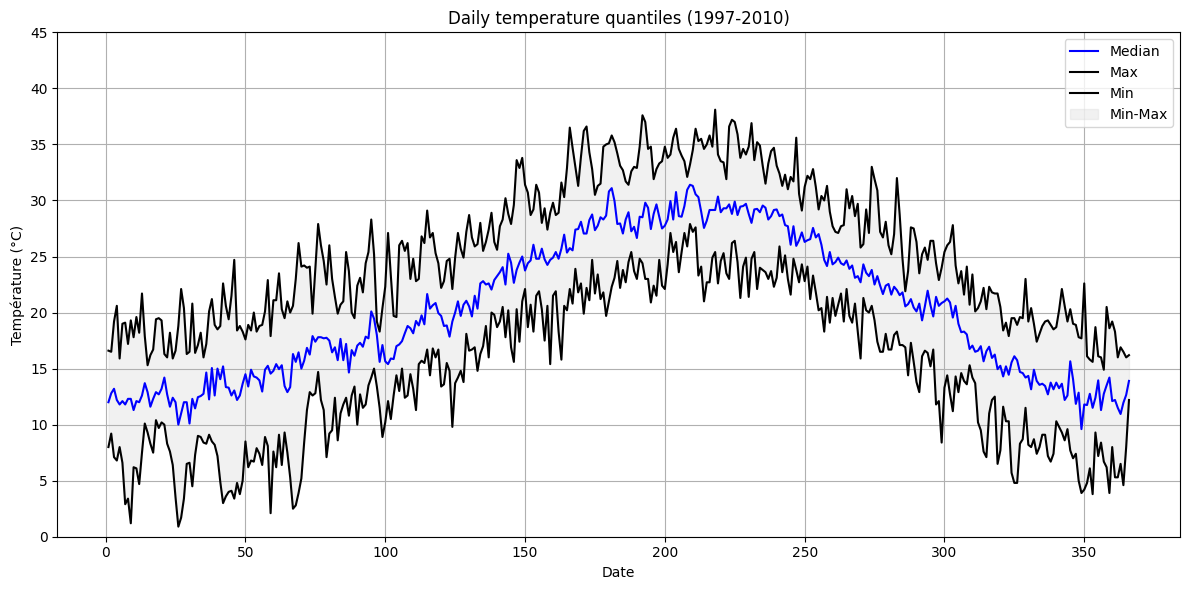

In [6]:
sr_max_frst = sr.loc["1997-02-01":"2010-12-31"]
sr_max_frst_d = sr_max_frst.resample("D").max()

dayofyear = sr_max_frst_d.index.dayofyear
sr_q50 = sr_max_frst_d.groupby(dayofyear).quantile(0.50)
sr_max = sr_max_frst_d.groupby(dayofyear).max()
sr_min = sr_max_frst_d.groupby(dayofyear).min()

plt.figure(figsize=(12, 6))
plt.plot(sr_q50.index, sr_q50, label="Median", color="blue")
plt.plot(sr_max.index, sr_max, label="Max", color="black")
plt.plot(sr_min.index, sr_min, label="Min", color="black")
plt.fill_between(sr_min.index, sr_min, sr_max, color="lightgray", alpha=0.3, label="Min-Max")
plt.legend()
plt.title("Daily temperature quantiles (1997-2010)")
plt.xlabel("Date")
plt.ylabel("Température (°C)")
plt.grid(True)
plt.tight_layout()
plt.ylim(0, 45)
plt.show()


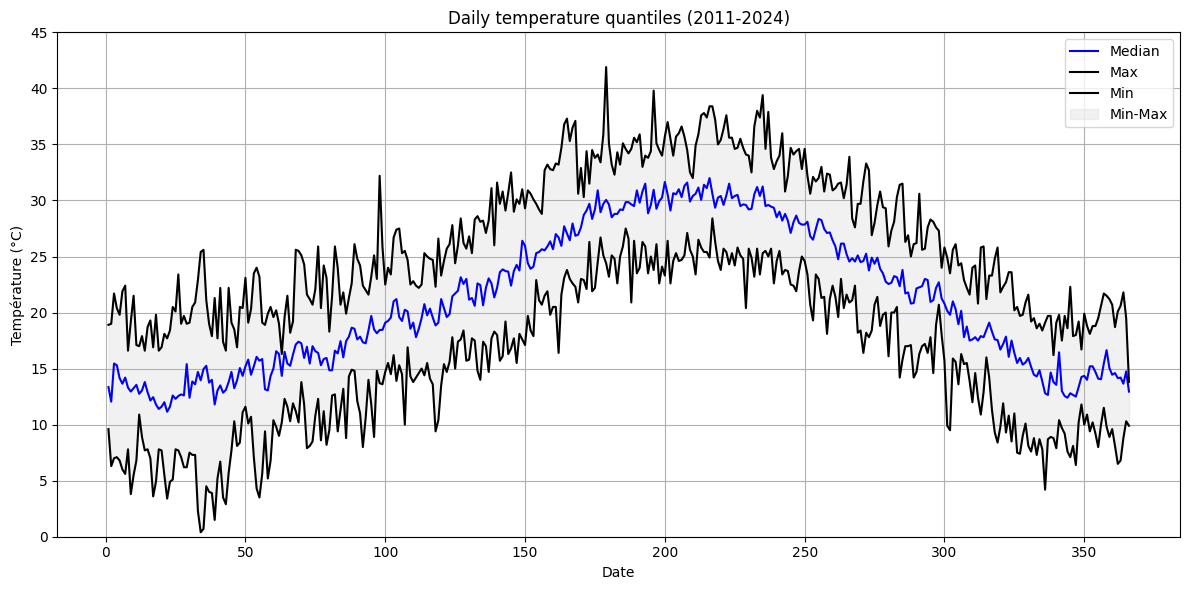

In [7]:
sr_max_snd = sr.loc["2011-01-01":"2024-12-31"]
sr_max_snd_d = sr_max_snd.resample("D").max()

dayofyear = sr_max_snd_d.index.dayofyear
sr_q50 = sr_max_snd_d.groupby(dayofyear).quantile(0.50)
sr_max = sr_max_snd_d.groupby(dayofyear).max()
sr_min = sr_max_snd_d.groupby(dayofyear).min()

plt.figure(figsize=(12, 6))
plt.plot(sr_q50.index, sr_q50, label="Median", color="blue")
plt.plot(sr_max.index, sr_max, label="Max", color="black")
plt.plot(sr_min.index, sr_min, label="Min", color="black")
plt.fill_between(sr_min.index, sr_min, sr_max, color="lightgray", alpha=0.3, label="Min-Max")
plt.legend()
plt.title("Daily temperature quantiles (2011-2024)")
plt.xlabel("Date")
plt.ylabel("Température (°C)")
plt.grid(True)
plt.tight_layout()
plt.ylim(0, 45)
plt.show()

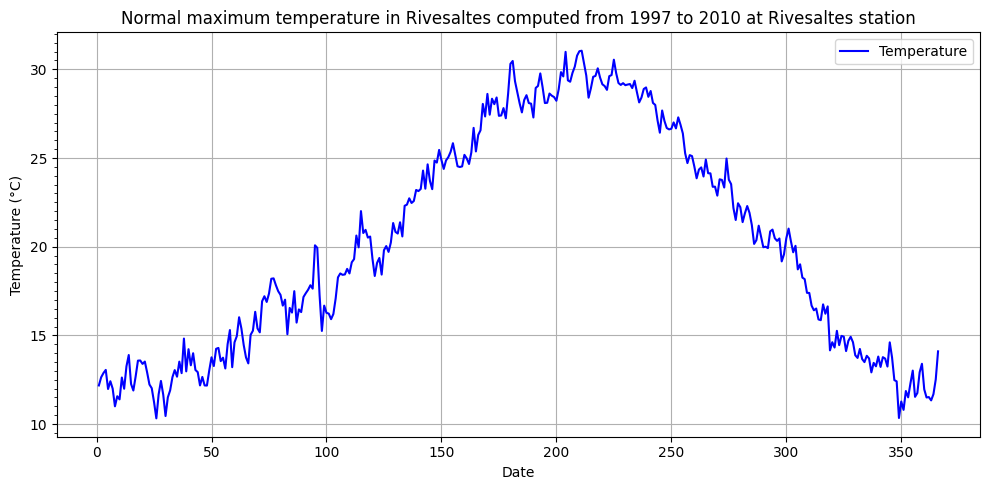

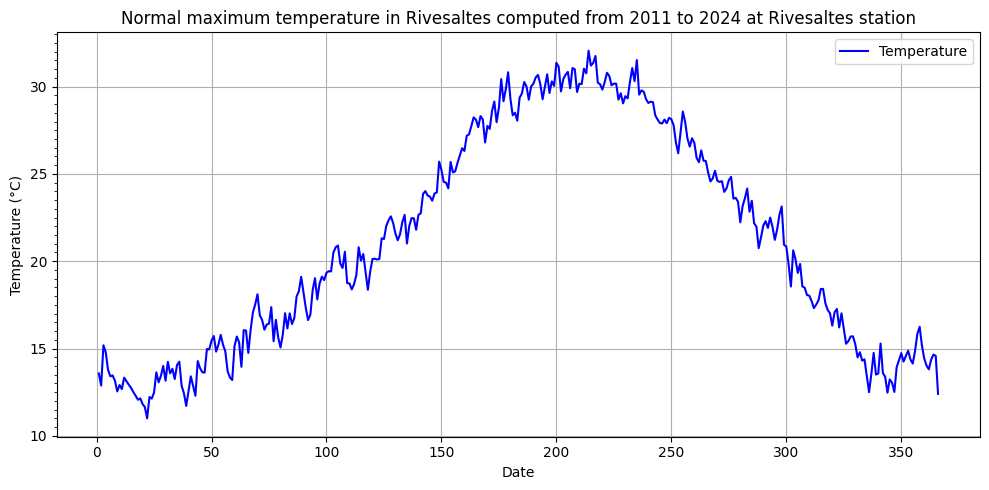

In [8]:
dayofyear = sr_max_frst_d.index.dayofyear
climato_frst = sr_max_frst_d.groupby(dayofyear).mean()
dayofyear = sr_max_snd_d.index.dayofyear
climato_sec = sr_max_snd_d.groupby(dayofyear).mean()

plot_data(
    climato_frst,
    "Temperature",
    "Normal maximum temperature in Rivesaltes computed from 1997 to 2010",
    "norm_max_temp_1997_2010"
)
plot_data(
    climato_sec,
    "Temperature",
    "Normal maximum temperature in Rivesaltes computed from 2011 to 2024",
    "norm_max_temp_2011_2024"
)

## Frequency of trespassing thresholds

#### JJA

Numbre of days with T < 30°C for 1997-2010 : 889
Numbre of days with T < 30°C for 2011-2024 : 745


<Figure size 600x500 with 0 Axes>

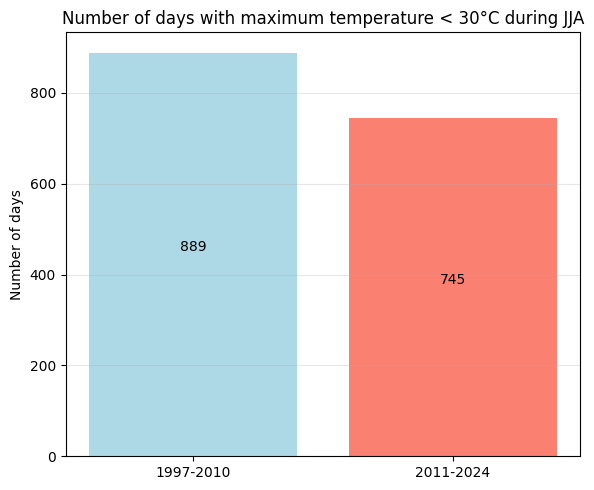

In [9]:
thresholds(
    months=[6, 7, 8],
    months_letter="JJA",
    first_sr=sr_max_frst_d,
    second_sr=sr_max_snd_d,
    threshold=30,
    periods=["1997-2010", "2011-2024"],
    study_sign="<"
)

#### SON

Numbre of days with T > 30°C for 1997-2009 : 25
Numbre of days with T > 30°C for 2010-2024 : 60


<Figure size 600x500 with 0 Axes>

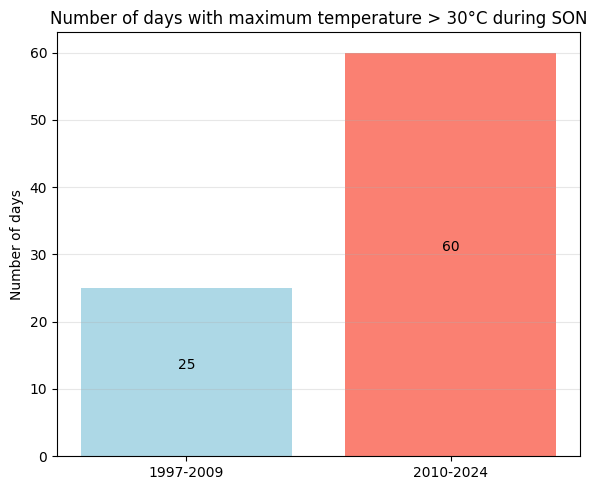

In [10]:
thresholds(
    months=[9, 10, 11],
    months_letter="SON",
    first_sr=sr_max_frst_d,
    second_sr=sr_max_snd_d,
    threshold=30,
    periods=["1997-2009", "2010-2024"],
    study_sign=">"
)

### DJF

Numbre of days with T < 5°C for 1997-2009 : 34
Numbre of days with T < 5°C for 2010-2024 : 19


<Figure size 600x500 with 0 Axes>

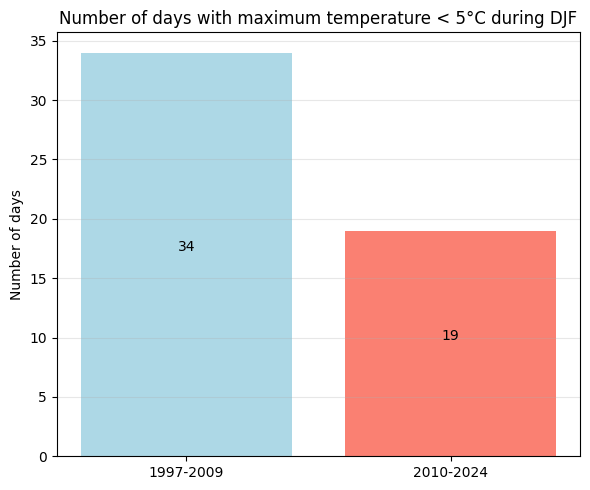

In [11]:
thresholds(
    months=[12, 1, 2],
    months_letter="DJF",
    first_sr=sr_max_frst_d,
    second_sr=sr_max_snd_d,
    threshold=5,
    periods=["1997-2009", "2010-2024"],
    study_sign="<"
)

#### MAM

Numbre of days with T > 25°C for 1997-2009 : 108
Numbre of days with T > 25°C for 2010-2024 : 120


<Figure size 600x500 with 0 Axes>

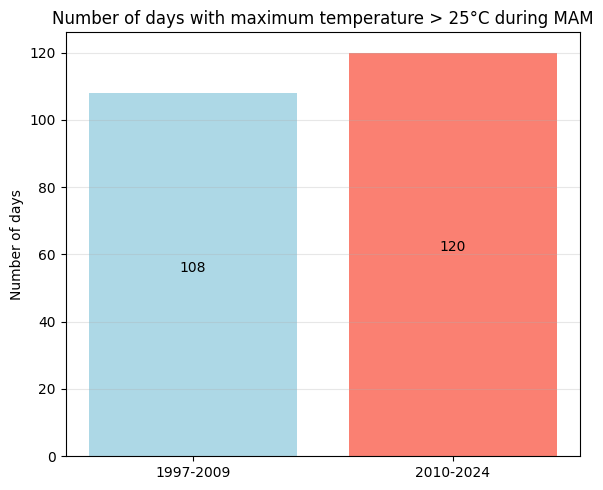

In [12]:
thresholds(
    months=[3, 4, 5],
    months_letter="MAM",
    first_sr=sr_max_frst_d,
    second_sr=sr_max_snd_d,
    threshold=25,
    periods=["1997-2009", "2010-2024"],
    study_sign=">"
)